In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [41]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [46]:
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day

In [48]:
data['hour'] = data['timestamp'].dt.hour

In [89]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [73]:
dayevent = data[['event','day']]

In [91]:
checkconv = dayevent[(dayevent['event']=='conversion')|(dayevent['event']=='checkout')]

In [96]:
event_day_cant = checkconv.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [97]:
event_day_cant.head()

index  cantidad
day                        
1   0    checkout      1049
    1  conversion        34
2   0    checkout      1040
    1  conversion        31
3   0    checkout       966

In [98]:
event_day_cant= event_day_cant.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventps')

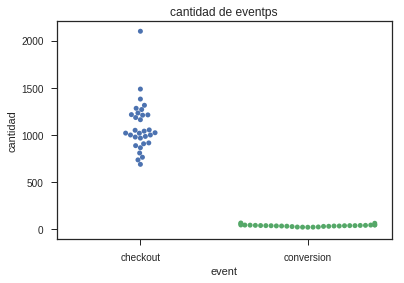

In [99]:
sns.swarmplot(x="event", y="cantidad", data=event_day_cant).set_title('cantidad de eventos estudiados por día'')

In [102]:
event_day = dayevent.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [103]:
event_day= event_day.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventos estudiados por día')

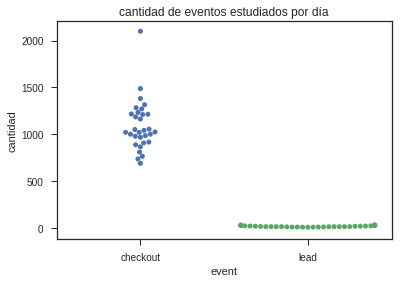

In [105]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='checkout')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

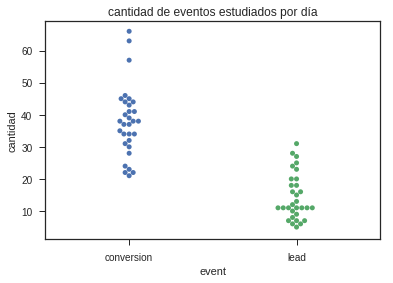

In [106]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

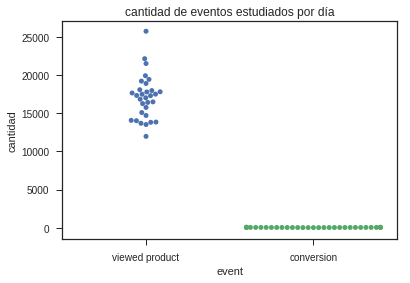

In [110]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

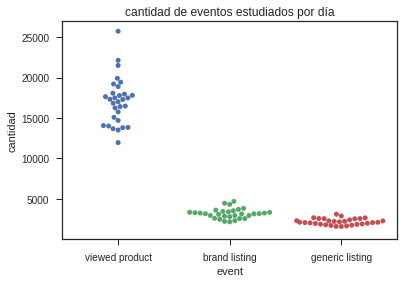

In [111]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='generic listing')|(event_day['event']=='brand listing')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

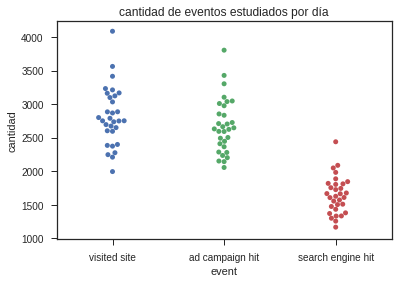

In [112]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='visited site')|(event_day['event']=='ad campaign hit')|(event_day['event']=='search engine hit')]).set_title('cantidad de eventos estudiados por día')

In [113]:
data.condition.value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [116]:
condition_event = data[['condition','event']]

In [117]:
event_condition = condition_event.groupby('condition').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [119]:
event_condition=event_condition.rename(columns={'index':'event'})

In [120]:
event_condition.head(2)

event  cantidad
condition                            
Bom       0  viewed product    227171
          1        checkout     15305

In [ ]:
sns.boxplot

Text(0.5,1,'cantidad de eventos estudiados por condición')

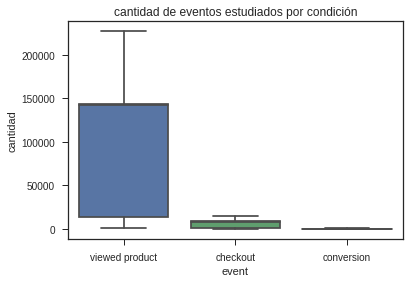

In [124]:
sns.boxplot(x="event", y="cantidad", data=event_condition).set_title('cantidad de eventos estudiados por condición')

In [115]:
data.storage.value_counts()

16GB     190833
32GB     184455
64GB     100024
128GB     40805
8GB       38181
256GB      6821
4GB        2152
512MB       565
Name: storage, dtype: int64

In [125]:
event_storage = data[['storage','event']]

In [126]:
event_storage = event_storage.groupby('storage').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [128]:
event_storage = event_storage.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventos estudiados por storage')

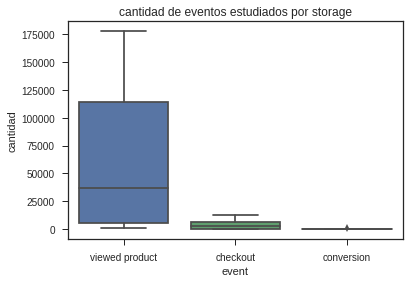

In [132]:
sns.boxplot(x="event", y="cantidad", data=event_storage).set_title('cantidad de eventos estudiados por storage')

In [ ]:
sns.violinplot()

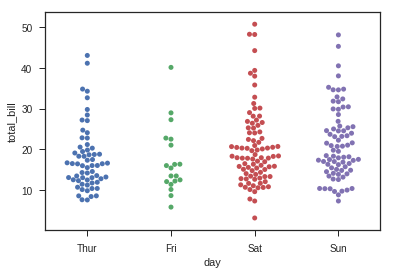

In [9]:
tips = sns.load_dataset("tips")
sns.swarmplot(x="day", y="total_bill", data=tips)